## QASM

[OpenQASM3](https://medium.com/qiskit/a-new-openqasm-for-a-new-era-of-dynamic-circuits-87f031cac49) is a new iteration of quantum assembler language, addresses problems of:
- dynamic circuits (those which can have classic control, not pure quantum)
- adding pulses (low level interactions), not only gates.
- time aware (decoherence time).


In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1, 0)
qc.measure_all()
code = qc.qasm()

with open('bell.qasm', 'w') as f:
    f.write(code)

# These are parser utilities
from qiskit.qasm import Qasm
qasm_obj = Qasm('bell.qasm')
prog = qasm_obj.parse()
tokens = qasm_obj.generate_tokens()

# this is usage
print(QuantumCircuit.from_qasm_file('bell.qasm').draw())
print(QuantumCircuit.from_qasm_str(code).draw())

             ┌───┐ ░ ┌─┐   
   q_0: ─────┤ X ├─░─┤M├───
        ┌───┐└─┬─┘ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░──╫─┤M├
        └───┘      ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
             ┌───┐ ░ ┌─┐   
   q_0: ─────┤ X ├─░─┤M├───
        ┌───┐└─┬─┘ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░──╫─┤M├
        └───┘      ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


# Barriers

Visual barriers, not considered in computations.

In [35]:
qc = QuantumCircuit(5)
qc.x(0)
qc.barrier()
qc.x(1)
qc.barrier(1)
qc.x(2)
qc.h(2)
qc.barrier(2, 4)
qc.x(4)
b = qc.barrier([1, 2, 4])
qc.z(3)
qc.draw()

┌───┐ ░                      
q_0: ┤ X ├─░──────────────────────
     └───┘ ░ ┌───┐  ░           ░ 
q_1: ──────░─┤ X ├──░───────────░─
           ░ ├───┤┌───┐ ░       ░ 
q_2: ──────░─┤ X ├┤ H ├─░───────░─
           ░ ├───┤└───┘ ░       ░ 
q_3: ──────░─┤ Z ├────────────────
           ░ └───┘      ░ ┌───┐ ░ 
q_4: ──────░────────────░─┤ X ├─░─
           ░            ░ └───┘ ░

# Operators

[source](https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html).

The Operator class is used in Qiskit to represent matrix operators acting on a quantum system. It has several methods to build composite operators using tensor products of smaller operators, and to compose operators.

Operators can be non-square.

In [50]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.extensions import RXGate, XGate, CXGate

XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
print(XX.dim)
print(XX.data)

print('Input dimensions:', XX.input_dims())
print('Output dimensions:', XX.output_dims())

(4, 4)
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]
Input dimensions: (2, 2)
Output dimensions: (2, 2)


Create an Operator from a Pauli object, Gate, and a Circuit.

In [60]:
print(Operator(Pauli('ZY')))
print()

qc = QuantumCircuit(2)
qc.z(1)
qc.y(0)
print(Operator(qc))
print()

print(Operator(CXGate()))

Operator([[0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j],
          [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Operator([[0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j],
          [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [52]:
Operator(CXGate())

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Unitary check

In [62]:
print(Operator(CXGate()).is_unitary())

print(Operator([[0, 1], [1, 1]]).is_unitary())

True
False


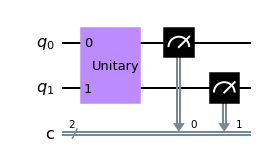

In [63]:
# Create an operator
XX = Operator(Pauli(label='XX'))

# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0,1], [0,1])
circ.draw('mpl')

Tensoring, composition, and linear combination

In [70]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))

AB = A.expand(B)
import numpy as np

np.allclose(AB.data, Operator(Pauli('ZX')).data)

print(A.compose(B))
print()
print(A + 3 * B)

Operator([[ 0.+0.j,  1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[ 3.+0.j,  1.+0.j],
          [ 1.+0.j, -3.+0.j]],
         input_dims=(2,), output_dims=(2,))


# Fidelity

We may also compare operators using the `process_fidelity` function from the Quantum Information module. This is an information theoretic quantity for how close two quantum channels are to each other, and in the case of unitary operators it does not depend on global phase.

In [72]:
from qiskit.quantum_info import process_fidelity

# Two operators which differ only by phase
op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())

# Compute process fidelity
F = process_fidelity(op_a, op_b)
print('Process fidelity =', F)

Process fidelity = 1.0


In [ ]:
TBC